In [47]:
import pandas as pd #untuk memproses data, manipulasi data, dan analisis data
import numpy as np #fungsi untuk aljabar linier dan pembuatan bilangan acak
import matplotlib.pyplot as plt #untuk visualisasi data seperti plot, histogram, bar chart, dll
%matplotlib inline
import seaborn as sns #untuk menampilkan visualisasi data lebih menarik
import librosa
import librosa.display
import resampy

from scipy import signal
import tensorflow as tf
import IPython.display as ipd

import pickle
from pickle import load

import pandas as pd

import os

#--Sklearn library-- membantu melakukan processing data ataupun melakukan training data
from sklearn.model_selection import train_test_split #membagi data secara acak
from sklearn.metrics import confusion_matrix, classification_report #untuk memplot confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay #untuk memplot confusion matrix
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score #model performance
from sklearn import metrics

import warnings

warnings.filterwarnings('ignore') # To supress warnings
 # set the background for the graphs
plt.style.use('ggplot')

In [48]:
def features_extractor(file_name):
    audio, sample_rate = librosa.load(file_name)

    emphasized_audio = librosa.effects.preemphasis(y=audio, coef=0.97)

    mfccs_features = librosa.feature.mfcc(y=emphasized_audio,
                                          n_fft=2048,
                                          hop_length=512,
                                          sr=44100,
                                          window='hamming',
                                          dct_type=2,
                                          n_mfcc=20)
    mfccs_scaled_features = np.mean(mfccs_features.T, axis=0)

    return mfccs_scaled_features

def extract_mfcc_from_folders(folder_paths):
    all_mfccs = []
    all_labels = []

    for i, folder_path in enumerate(folder_paths):
        label = i  # Assign a unique label to each class
        for filename in os.listdir(folder_path):
            file_path = os.path.join(folder_path, filename)
            if os.path.isfile(file_path) and filename.endswith('.wav'):
                mfccs = features_extractor(file_path)
                all_mfccs.append(mfccs)
                all_labels.append(label)

    return np.array(all_mfccs), np.array(all_labels)

# Define paths to the training and testing folders for each class
training_folder_paths = [
    r'C:\Users\ushine\Data Mining\Azan Sukses\split_azan_dataset\training\ajam',
    r'C:\Users\ushine\Data Mining\Azan Sukses\split_azan_dataset\training\bayati',
    r'C:\Users\ushine\Data Mining\Azan Sukses\split_azan_dataset\training\hijaz',
    r'C:\Users\ushine\Data Mining\Azan Sukses\split_azan_dataset\training\nahawand',
    r'C:\Users\ushine\Data Mining\Azan Sukses\split_azan_dataset\training\rast'
]

testing_folder_paths = [
    r'C:\Users\ushine\Data Mining\Azan Sukses\split_azan_dataset\testing\ajam',
    r'C:\Users\ushine\Data Mining\Azan Sukses\split_azan_dataset\testing\bayati',
    r'C:\Users\ushine\Data Mining\Azan Sukses\split_azan_dataset\testing\hijaz',
    r'C:\Users\ushine\Data Mining\Azan Sukses\split_azan_dataset\testing\nahawand',
    r'C:\Users\ushine\Data Mining\Azan Sukses\split_azan_dataset\testing\rast'
]

# Extract MFCCs and labels from training data
training_mfccs, training_labels = extract_mfcc_from_folders(training_folder_paths)

# Extract MFCCs and labels from testing data
testing_mfccs, testing_labels = extract_mfcc_from_folders(testing_folder_paths)

# Display the shape of the resulting arrays
print("Training MFCCs shape:", training_mfccs.shape)
print("Training Labels shape:", training_labels.shape)
print("Testing MFCCs shape:", testing_mfccs.shape)
print("Testing Labels shape:", testing_labels.shape)

# Save extracted features and labels using pickle
training_data = {'features': training_mfccs, 'labels': training_labels}
testing_data = {'features': testing_mfccs, 'labels': testing_labels}

with open('./Training_Data.pkl', 'wb') as f:
    pickle.dump(training_data, f)

with open('./Testing_Data.pkl', 'wb') as f:
    pickle.dump(testing_data, f)

# Load extracted features and labels using pickle
with open('./Training_Data.pkl', 'rb') as f:
    training_data = pickle.load(f)

with open('./Testing_Data.pkl', 'rb') as f:
    testing_data = pickle.load(f)

# Create DataFrames for training and testing data
training_df = pd.DataFrame({'feature': training_data['features'].tolist(), 'label': training_data['labels']})
testing_df = pd.DataFrame({'feature': testing_data['features'].tolist(), 'label': testing_data['labels']})

# Rename labels
label_mapping = {0: 'ajam', 1: 'bayati', 2: 'hijaz', 3: 'nahawand', 4: 'rast'}
training_df['label'] = training_df['label'].map(label_mapping)
testing_df['label'] = testing_df['label'].map(label_mapping)

Training MFCCs shape: (1600, 20)
Training Labels shape: (1600,)
Testing MFCCs shape: (400, 20)
Testing Labels shape: (400,)


In [49]:
# Tampilkan seluruh data dari DataFrame training_df
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
print("Training DataFrame:")
training_df

Training DataFrame:


,feature,label
0,"[-169.40005493164062, -87.45153045654297, -32....",ajam
1,"[-216.03111267089844, -81.64463806152344, -28....",ajam
2,"[-269.8840637207031, -107.09385681152344, -25....",ajam
3,"[-248.83279418945312, -91.78166961669922, -9.5...",ajam
4,"[-287.2140197753906, -89.90975952148438, -19.8...",ajam
5,"[-215.65478515625, -105.49163818359375, -35.61...",ajam
6,"[-259.1195373535156, -80.16199493408203, -22.2...",ajam
7,"[-266.0588073730469, -69.66576385498047, -23.6...",ajam
8,"[-267.2538757324219, -85.51531982421875, -32.5...",ajam
9,"[-306.8114013671875, -75.06046295166016, -26.2...",ajam


In [50]:
# Tampilkan seluruh data dari DataFrame testing_df
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
print("\nTesting DataFrame:")
testing_df


Testing DataFrame:


,feature,label
0,"[-250.51219177246094, -88.4227066040039, -51.5...",ajam
1,"[-253.3995819091797, -72.78446197509766, -20.7...",ajam
2,"[-212.60862731933594, -91.84952545166016, -31....",ajam
3,"[-225.0244598388672, -85.6840591430664, -33.54...",ajam
4,"[-213.65835571289062, -97.1494140625, -45.9540...",ajam
5,"[-198.89625549316406, -108.28191375732422, -40...",ajam
6,"[-238.53306579589844, -88.45026397705078, -20....",ajam
7,"[-246.26458740234375, -100.0235824584961, -22....",ajam
8,"[-313.7008361816406, -49.270179748535156, -85....",ajam
9,"[-308.4237976074219, -38.88069152832031, -26.7...",ajam


In [51]:
# Extract features and labels from training DataFrame
X_train = np.array(training_df['feature'].tolist())
y_train = np.array(training_df['label'].tolist())

# Extract features and labels from testing DataFrame
X_test = np.array(testing_df['feature'].tolist())
y_test = np.array(testing_df['label'].tolist())

# Display the shape of the resulting arrays
print("Training Features shape:", X_train.shape)
print("Training Labels shape:", y_train.shape)
print("Testing Features shape:", X_test.shape)
print("Testing Labels shape:", y_test.shape)

Training Features shape: (1600, 20)
Training Labels shape: (1600,)
Testing Features shape: (400, 20)
Testing Labels shape: (400,)


In [52]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

# Convert labels to numerical encoding
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.fit_transform(y_test)

In [53]:
y_train = to_categorical(y_train_encoded)
y_test = to_categorical(y_test_encoded)

In [54]:
import numpy as np
import time
import random
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold


# Best Hyperparameters from Grid Search
best_hyperparameters = {'dropout_rate1': 0.4, 'dropout_rate2': 0.2, 'dropout_rate3': 0.1, 'dropout_rate4': 0.1, 
                        'learning_rate': 0.001, 'units_layer1': 512, 'units_layer2': 512, 'units_layer3': 128, 
                        'units_layer4': 64, 'units_layer5': 64}


# Inisialisasi K-Fold Cross Validation
kf = KFold(n_splits=10, shuffle=True, random_state=random.randint(1, 1000))
fold = 1

losses = []  # Untuk menyimpan hasil loss
train_accuracies = []  # Untuk menyimpan hasil akurasi training
testing_accuracies = []  # Untuk menyimpan hasil akurasi testing
histories = [] # Untuk menyimpan hasil model
training_times = [] # Untuk menyimpan waktu pelatihan setiap fold
all_predictions = []
precicion_scores = []
recall_scores = []
f1_scores = []  # Untuk menyimpan F1 score dari setiap fold
classification_reports = [] #Untuk menyimpan laporan klasifikasi

# Loop melalui setiap lipatan
for train_index, test_index in kf.split(X_train, y_train):
    X_train_fold, X_test_fold = X_train[train_index], X_train[test_index]
    y_train_fold, y_test_fold = y_train[train_index], y_train[test_index]
    
    # Persentase pembagian data training dan testing
    percentage_train = len(train_index) / len(X_train) * 100
    percentage_test = len(test_index) / len(X_train) * 100

    # Inisialisasi model neural network dengan menggunakan parameter terbaik
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense(units=best_hyperparameters['units_layer1'], input_shape=(20,), activation="relu"))
    model.add(tf.keras.layers.Dropout(best_hyperparameters['dropout_rate1']))
    model.add(tf.keras.layers.Dense(units=best_hyperparameters['units_layer2'], activation="relu"))
    model.add(tf.keras.layers.Dropout(best_hyperparameters['dropout_rate2']))
    model.add(tf.keras.layers.Dense(units=best_hyperparameters['units_layer3'], activation="relu"))
    model.add(tf.keras.layers.Dropout(best_hyperparameters['dropout_rate3']))
    model.add(tf.keras.layers.Dense(units=best_hyperparameters['units_layer4'], activation="relu"))
    model.add(tf.keras.layers.Dropout(best_hyperparameters['dropout_rate4']))
    model.add(tf.keras.layers.Dense(units=best_hyperparameters['units_layer5'], activation="relu"))
    model.add(tf.keras.layers.Dense(units=5, activation="softmax"))

    # Kompilasi model
    optimizer = tf.keras.optimizers.Adam(best_hyperparameters['learning_rate'])
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    # Catat waktu awal
    start_time = time.time()
    
    # Tampilkan Keterangan Fold
    print(f"Fold {fold}")
    
    # Print persentase pembagian data training dan testing
    print(f"Percentage of Data for Training: {percentage_train:.2f}%")
    print(f"Percentage of Data for Testing: {percentage_test:.2f}%")

    # Latih model
    history = model.fit(X_train_fold, y_train_fold, epochs=100, batch_size=64)
    histories.append(history)
    model.summary()

    # Catat waktu selesai
    end_time = time.time()

    # Hitung waktu eksekusi
    elapsed_time = end_time - start_time
    training_times.append(elapsed_time)

    # Evaluasi model
    loss, accuracy = model.evaluate(X_train_fold, y_train_fold)
    losses.append(loss)
    train_accuracies.append(accuracy)

    # Prediksi model
    pred = model.predict(X_test_fold)
    pred_ = np.argmax(pred, axis=1)
    pred_ = label_encoder.inverse_transform(pred_)
    true_y = label_encoder.inverse_transform(np.argmax(to_categorical(y_test_fold), axis=1)[:, 1])

    # Menyimpan hasil prediksi dari fold tertentu
    fold_predictions = {'true_labels': true_y, 'predicted_labels': pred_}
    all_predictions.append(fold_predictions)
    
    # Hitung testing akurasi pada fold tertentu
    accuracy_test = accuracy_score(true_y, pred_)
    testing_accuracies.append(accuracy_test)

    # Menghitung Precision, Recall, F1 Score
    precision = precision_score(true_y, pred_, average=None)
    precicion_scores.append(precision)

    recall = recall_score(true_y, pred_, average=None)
    recall_scores.append(recall)

    f1 = f1_score(true_y, pred_, average=None)
    f1_scores.append(f1)

    # Hitung laporan klasifikasi
    report = classification_report(true_y, pred_)
    classification_reports.append(report)

    
    fold += 1


Fold 1
Percentage of Data for Training: 90.00%
Percentage of Data for Testing: 10.00%
Epoch 1/100
23/23 [==============================] - 27s 34ms/step - loss: 3.8019 - accuracy: 0.2076
Epoch 2/100
23/23 [==============================] - 1s 40ms/step - loss: 1.8925 - accuracy: 0.2222
Epoch 3/100
23/23 [==============================] - 1s 40ms/step - loss: 1.6931 - accuracy: 0.2451
Epoch 4/100
23/23 [==============================] - 1s 53ms/step - loss: 1.5883 - accuracy: 0.2819
Epoch 5/100
23/23 [==============================] - 1s 43ms/step - loss: 1.5355 - accuracy: 0.2917
Epoch 6/100
23/23 [==============================] - 1s 35ms/step - loss: 1.4863 - accuracy: 0.3271
Epoch 7/100
23/23 [==============================] - 1s 37ms/step - loss: 1.4493 - accuracy: 0.3208
Epoch 8/100
23/23 [==============================] - 1s 44ms/step - loss: 1.4376 - accuracy: 0.3472
Epoch 9/100
23/23 [==============================] - 1s 45ms/step - loss: 1.4073 - accuracy: 0.3493
Epoch 10/100


23/23 [==============================] - 1s 54ms/step - loss: 0.5631 - accuracy: 0.7778
Epoch 82/100
23/23 [==============================] - 1s 51ms/step - loss: 0.5701 - accuracy: 0.7778
Epoch 83/100
23/23 [==============================] - 1s 57ms/step - loss: 0.5433 - accuracy: 0.7799
Epoch 84/100
23/23 [==============================] - 1s 52ms/step - loss: 0.5508 - accuracy: 0.7799
Epoch 85/100
23/23 [==============================] - 1s 54ms/step - loss: 0.5679 - accuracy: 0.7806
Epoch 86/100
23/23 [==============================] - 2s 69ms/step - loss: 0.5380 - accuracy: 0.7937
Epoch 87/100
23/23 [==============================] - 1s 59ms/step - loss: 0.5000 - accuracy: 0.8118
Epoch 88/100
23/23 [==============================] - 1s 61ms/step - loss: 0.5243 - accuracy: 0.7993
Epoch 89/100
23/23 [==============================] - 1s 42ms/step - loss: 0.4901 - accuracy: 0.8174
Epoch 90/100
23/23 [==============================] - 1s 55ms/step - loss: 0.5323 - accuracy: 0.7917
Epo

23/23 [==============================] - 1s 28ms/step - loss: 1.0013 - accuracy: 0.5632
Epoch 43/100
23/23 [==============================] - 1s 28ms/step - loss: 0.9818 - accuracy: 0.5819
Epoch 44/100
23/23 [==============================] - 1s 29ms/step - loss: 0.9571 - accuracy: 0.5938
Epoch 45/100
23/23 [==============================] - 1s 29ms/step - loss: 0.9567 - accuracy: 0.5826
Epoch 46/100
23/23 [==============================] - 1s 30ms/step - loss: 0.9515 - accuracy: 0.6000
Epoch 47/100
23/23 [==============================] - 1s 29ms/step - loss: 0.9283 - accuracy: 0.6083
Epoch 48/100
23/23 [==============================] - 1s 28ms/step - loss: 0.9509 - accuracy: 0.5951
Epoch 49/100
23/23 [==============================] - 1s 28ms/step - loss: 0.9226 - accuracy: 0.6118
Epoch 50/100
23/23 [==============================] - 1s 30ms/step - loss: 0.8981 - accuracy: 0.6257
Epoch 51/100
23/23 [==============================] - 1s 34ms/step - loss: 0.8570 - accuracy: 0.6451
Epo

23/23 [==============================] - 1s 40ms/step - loss: 1.7235 - accuracy: 0.2174
Epoch 4/100
23/23 [==============================] - 1s 39ms/step - loss: 1.6644 - accuracy: 0.2139
Epoch 5/100
23/23 [==============================] - 1s 41ms/step - loss: 1.6193 - accuracy: 0.2451
Epoch 6/100
23/23 [==============================] - 1s 45ms/step - loss: 1.5723 - accuracy: 0.2736
Epoch 7/100
23/23 [==============================] - 1s 36ms/step - loss: 1.5364 - accuracy: 0.2889
Epoch 8/100
23/23 [==============================] - 1s 39ms/step - loss: 1.4840 - accuracy: 0.3187
Epoch 9/100
23/23 [==============================] - 1s 43ms/step - loss: 1.4669 - accuracy: 0.3222
Epoch 10/100
23/23 [==============================] - 1s 32ms/step - loss: 1.4073 - accuracy: 0.3639
Epoch 11/100
23/23 [==============================] - 1s 35ms/step - loss: 1.4105 - accuracy: 0.3604
Epoch 12/100
23/23 [==============================] - 1s 47ms/step - loss: 1.3937 - accuracy: 0.3660
Epoch 13/

23/23 [==============================] - 1s 49ms/step - loss: 0.6449 - accuracy: 0.7340
Epoch 85/100
23/23 [==============================] - 1s 51ms/step - loss: 0.6824 - accuracy: 0.7306
Epoch 86/100
23/23 [==============================] - 1s 53ms/step - loss: 0.6454 - accuracy: 0.7333
Epoch 87/100
23/23 [==============================] - 1s 58ms/step - loss: 0.6610 - accuracy: 0.7271
Epoch 88/100
23/23 [==============================] - 1s 44ms/step - loss: 0.6333 - accuracy: 0.7472
Epoch 89/100
23/23 [==============================] - 1s 51ms/step - loss: 0.5953 - accuracy: 0.7556
Epoch 90/100
23/23 [==============================] - 1s 40ms/step - loss: 0.6135 - accuracy: 0.7625
Epoch 91/100
23/23 [==============================] - 1s 53ms/step - loss: 0.6290 - accuracy: 0.7382
Epoch 92/100
23/23 [==============================] - 1s 45ms/step - loss: 0.5634 - accuracy: 0.7757
Epoch 93/100
23/23 [==============================] - 1s 43ms/step - loss: 0.5324 - accuracy: 0.7924
Epo

23/23 [==============================] - 1s 37ms/step - loss: 1.0700 - accuracy: 0.5437
Epoch 46/100
23/23 [==============================] - 1s 47ms/step - loss: 1.0410 - accuracy: 0.5514
Epoch 47/100
23/23 [==============================] - 1s 46ms/step - loss: 1.0235 - accuracy: 0.5618
Epoch 48/100
23/23 [==============================] - 1s 46ms/step - loss: 1.0011 - accuracy: 0.5729
Epoch 49/100
23/23 [==============================] - 1s 45ms/step - loss: 0.9971 - accuracy: 0.5806
Epoch 50/100
23/23 [==============================] - 1s 46ms/step - loss: 0.9884 - accuracy: 0.5799
Epoch 51/100
23/23 [==============================] - 1s 47ms/step - loss: 0.9966 - accuracy: 0.6035
Epoch 52/100
23/23 [==============================] - 1s 43ms/step - loss: 0.9759 - accuracy: 0.5889
Epoch 53/100
23/23 [==============================] - 1s 52ms/step - loss: 0.9236 - accuracy: 0.6069
Epoch 54/100
23/23 [==============================] - 1s 45ms/step - loss: 0.9537 - accuracy: 0.6174
Epo

23/23 [==============================] - 1s 59ms/step - loss: 1.5102 - accuracy: 0.3125
Epoch 7/100
23/23 [==============================] - 1s 58ms/step - loss: 1.4919 - accuracy: 0.3361
Epoch 8/100
23/23 [==============================] - 2s 75ms/step - loss: 1.4128 - accuracy: 0.3847
Epoch 9/100
23/23 [==============================] - 1s 50ms/step - loss: 1.4308 - accuracy: 0.3493
Epoch 10/100
23/23 [==============================] - 1s 43ms/step - loss: 1.4057 - accuracy: 0.3576
Epoch 11/100
23/23 [==============================] - 1s 55ms/step - loss: 1.3749 - accuracy: 0.3889
Epoch 12/100
23/23 [==============================] - 1s 51ms/step - loss: 1.3921 - accuracy: 0.3604
Epoch 13/100
23/23 [==============================] - 1s 51ms/step - loss: 1.3306 - accuracy: 0.3861
Epoch 14/100
23/23 [==============================] - 1s 54ms/step - loss: 1.3313 - accuracy: 0.4056
Epoch 15/100
23/23 [==============================] - 1s 56ms/step - loss: 1.3122 - accuracy: 0.4042
Epoch 

23/23 [==============================] - 1s 33ms/step - loss: 0.5146 - accuracy: 0.8062
Epoch 88/100
23/23 [==============================] - 1s 33ms/step - loss: 0.5043 - accuracy: 0.7972
Epoch 89/100
23/23 [==============================] - 1s 40ms/step - loss: 0.4937 - accuracy: 0.8090
Epoch 90/100
23/23 [==============================] - 1s 41ms/step - loss: 0.5028 - accuracy: 0.7882
Epoch 91/100
23/23 [==============================] - 1s 35ms/step - loss: 0.4716 - accuracy: 0.8132
Epoch 92/100
23/23 [==============================] - 1s 41ms/step - loss: 0.4617 - accuracy: 0.8021
Epoch 93/100
23/23 [==============================] - 1s 37ms/step - loss: 0.5034 - accuracy: 0.8062
Epoch 94/100
23/23 [==============================] - 1s 38ms/step - loss: 0.4163 - accuracy: 0.8562
Epoch 95/100
23/23 [==============================] - 1s 37ms/step - loss: 0.4526 - accuracy: 0.8243
Epoch 96/100
23/23 [==============================] - 1s 41ms/step - loss: 0.4253 - accuracy: 0.8340
Epo

23/23 [==============================] - 1s 46ms/step - loss: 0.9676 - accuracy: 0.5972
Epoch 49/100
23/23 [==============================] - 2s 67ms/step - loss: 0.9498 - accuracy: 0.6062
Epoch 50/100
23/23 [==============================] - 1s 65ms/step - loss: 0.9171 - accuracy: 0.6285
Epoch 51/100
23/23 [==============================] - 1s 59ms/step - loss: 0.9539 - accuracy: 0.5924
Epoch 52/100
23/23 [==============================] - 1s 56ms/step - loss: 0.9240 - accuracy: 0.6035
Epoch 53/100
23/23 [==============================] - 1s 61ms/step - loss: 0.9040 - accuracy: 0.6194
Epoch 54/100
23/23 [==============================] - 1s 62ms/step - loss: 0.8864 - accuracy: 0.6229
Epoch 55/100
23/23 [==============================] - 1s 44ms/step - loss: 0.8855 - accuracy: 0.6340
Epoch 56/100
23/23 [==============================] - 1s 57ms/step - loss: 0.8674 - accuracy: 0.6354
Epoch 57/100
23/23 [==============================] - 1s 54ms/step - loss: 0.8261 - accuracy: 0.6618
Epo

23/23 [==============================] - 1s 54ms/step - loss: 1.4168 - accuracy: 0.3472
Epoch 10/100
23/23 [==============================] - 1s 64ms/step - loss: 1.3945 - accuracy: 0.3472
Epoch 11/100
23/23 [==============================] - 1s 62ms/step - loss: 1.3859 - accuracy: 0.3576
Epoch 12/100
23/23 [==============================] - 1s 58ms/step - loss: 1.3530 - accuracy: 0.3792
Epoch 13/100
23/23 [==============================] - 1s 54ms/step - loss: 1.3461 - accuracy: 0.3840
Epoch 14/100
23/23 [==============================] - 1s 48ms/step - loss: 1.3174 - accuracy: 0.3986
Epoch 15/100
23/23 [==============================] - 1s 55ms/step - loss: 1.2875 - accuracy: 0.4021
Epoch 16/100
23/23 [==============================] - 1s 59ms/step - loss: 1.3032 - accuracy: 0.4042
Epoch 17/100
23/23 [==============================] - 1s 53ms/step - loss: 1.2744 - accuracy: 0.4208
Epoch 18/100
23/23 [==============================] - 1s 58ms/step - loss: 1.2649 - accuracy: 0.4285
Epo

23/23 [==============================] - 1s 32ms/step - loss: 0.5638 - accuracy: 0.7785
Epoch 91/100
23/23 [==============================] - 1s 35ms/step - loss: 0.5136 - accuracy: 0.7986
Epoch 92/100
23/23 [==============================] - 1s 31ms/step - loss: 0.5333 - accuracy: 0.7972
Epoch 93/100
23/23 [==============================] - 1s 42ms/step - loss: 0.5004 - accuracy: 0.8076
Epoch 94/100
23/23 [==============================] - 1s 37ms/step - loss: 0.4795 - accuracy: 0.8097
Epoch 95/100
23/23 [==============================] - 1s 43ms/step - loss: 0.4834 - accuracy: 0.8000
Epoch 96/100
23/23 [==============================] - 1s 33ms/step - loss: 0.4510 - accuracy: 0.8222
Epoch 97/100
23/23 [==============================] - 1s 34ms/step - loss: 0.4640 - accuracy: 0.8257
Epoch 98/100
23/23 [==============================] - 1s 31ms/step - loss: 0.4754 - accuracy: 0.8243
Epoch 99/100
23/23 [==============================] - 1s 26ms/step - loss: 0.4788 - accuracy: 0.8160
Epo

23/23 [==============================] - 1s 49ms/step - loss: 0.9878 - accuracy: 0.5729
Epoch 52/100
23/23 [==============================] - 1s 50ms/step - loss: 0.9648 - accuracy: 0.5944
Epoch 53/100
23/23 [==============================] - 1s 56ms/step - loss: 0.9413 - accuracy: 0.5924
Epoch 54/100
23/23 [==============================] - 1s 52ms/step - loss: 0.9224 - accuracy: 0.6285
Epoch 55/100
23/23 [==============================] - 1s 45ms/step - loss: 0.9451 - accuracy: 0.6153
Epoch 56/100
23/23 [==============================] - 1s 53ms/step - loss: 0.9131 - accuracy: 0.6021
Epoch 57/100
23/23 [==============================] - 1s 58ms/step - loss: 0.9155 - accuracy: 0.6111
Epoch 58/100
23/23 [==============================] - 1s 49ms/step - loss: 0.8889 - accuracy: 0.6271
Epoch 59/100
23/23 [==============================] - 1s 50ms/step - loss: 0.8790 - accuracy: 0.6410
Epoch 60/100
23/23 [==============================] - 1s 59ms/step - loss: 0.8552 - accuracy: 0.6403
Epo

23/23 [==============================] - 1s 37ms/step - loss: 1.3428 - accuracy: 0.3646
Epoch 13/100
23/23 [==============================] - 1s 34ms/step - loss: 1.3553 - accuracy: 0.3549
Epoch 14/100
23/23 [==============================] - 1s 42ms/step - loss: 1.3589 - accuracy: 0.3764
Epoch 15/100
23/23 [==============================] - 1s 33ms/step - loss: 1.3144 - accuracy: 0.3792
Epoch 16/100
23/23 [==============================] - 1s 34ms/step - loss: 1.3133 - accuracy: 0.3708
Epoch 17/100
23/23 [==============================] - 1s 29ms/step - loss: 1.2804 - accuracy: 0.4028
Epoch 18/100
23/23 [==============================] - 1s 30ms/step - loss: 1.2834 - accuracy: 0.3979
Epoch 19/100
23/23 [==============================] - 1s 35ms/step - loss: 1.2720 - accuracy: 0.4062
Epoch 20/100
23/23 [==============================] - 1s 35ms/step - loss: 1.2574 - accuracy: 0.4215
Epoch 21/100
23/23 [==============================] - 1s 33ms/step - loss: 1.2537 - accuracy: 0.4090
Epo

23/23 [==============================] - 1s 33ms/step - loss: 0.4840 - accuracy: 0.8125
Epoch 94/100
23/23 [==============================] - 1s 26ms/step - loss: 0.4763 - accuracy: 0.8174
Epoch 95/100
23/23 [==============================] - 1s 25ms/step - loss: 0.5001 - accuracy: 0.8042
Epoch 96/100
23/23 [==============================] - 1s 27ms/step - loss: 0.4787 - accuracy: 0.8264
Epoch 97/100
23/23 [==============================] - 1s 28ms/step - loss: 0.4540 - accuracy: 0.8257
Epoch 98/100
23/23 [==============================] - 1s 28ms/step - loss: 0.4388 - accuracy: 0.8278
Epoch 99/100
23/23 [==============================] - 1s 26ms/step - loss: 0.4450 - accuracy: 0.8243
Epoch 100/100
23/23 [==============================] - 1s 27ms/step - loss: 0.4362 - accuracy: 0.8368
Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_168 (Dense)           (None, 512)         

23/23 [==============================] - 1s 30ms/step - loss: 0.9034 - accuracy: 0.6146
Epoch 55/100
23/23 [==============================] - 1s 27ms/step - loss: 0.8857 - accuracy: 0.6444
Epoch 56/100
23/23 [==============================] - 1s 30ms/step - loss: 0.8777 - accuracy: 0.6153
Epoch 57/100
23/23 [==============================] - 1s 26ms/step - loss: 0.8613 - accuracy: 0.6396
Epoch 58/100
23/23 [==============================] - 1s 26ms/step - loss: 0.8463 - accuracy: 0.6632
Epoch 59/100
23/23 [==============================] - 1s 28ms/step - loss: 0.8506 - accuracy: 0.6368
Epoch 60/100
23/23 [==============================] - 1s 31ms/step - loss: 0.8215 - accuracy: 0.6597
Epoch 61/100
23/23 [==============================] - 1s 32ms/step - loss: 0.8129 - accuracy: 0.6674
Epoch 62/100
23/23 [==============================] - 1s 34ms/step - loss: 0.8169 - accuracy: 0.6653
Epoch 63/100
23/23 [==============================] - 1s 26ms/step - loss: 0.7917 - accuracy: 0.6646
Epo

In [55]:
# Access and print the random state
print("Random State:", kf.random_state)

Random State: 832


In [56]:
# Menampilkan hasil prediksi, metrik evaluasi, dan laporan klasifikasi untuk setiap fold
for i in range(1, fold-1):
    print(f"\nResults for Fold {i}:")
    print(f"Training Accuracy: {train_accuracies[i-1]}")
    print(f"Testing Accuracy: {testing_accuracies[i-1]}")
    print(f"Loss: {losses[i-1]}")
    print(f"Training Time: {training_times[i-1]} seconds")
    print("Precision Scores:", precicion_scores[i-1])
    print("Recall Scores:", recall_scores[i-1])
    print("F1 Scores:", f1_scores[i-1])
    print("Classification Report:\n", classification_reports[i-1])

    # Optional: Menampilkan prediksi untuk setiap fold
    fold_predictions = all_predictions[i-1]
    true_labels = fold_predictions['true_labels']
    predicted_labels = fold_predictions['predicted_labels']
    for true, pred in zip(true_labels, predicted_labels):
        print(f"True Label: {true}, Predicted Label: {pred}")



Results for Fold 1:
Training Accuracy: 0.9458333253860474
Testing Accuracy: 0.75625
Loss: 0.20359143614768982
Training Time: 139.9663791656494 seconds
Precision Scores: [0.78947368 0.64285714 0.61290323 0.95454545 0.88888889]
Recall Scores: [0.78947368 0.81818182 0.65517241 0.61764706 0.92307692]
F1 Scores: [0.78947368 0.72       0.63333333 0.75       0.90566038]
Classification Report:
               precision    recall  f1-score   support

        ajam       0.79      0.79      0.79        38
      bayati       0.64      0.82      0.72        33
       hijaz       0.61      0.66      0.63        29
    nahawand       0.95      0.62      0.75        34
        rast       0.89      0.92      0.91        26

    accuracy                           0.76       160
   macro avg       0.78      0.76      0.76       160
weighted avg       0.78      0.76      0.76       160

True Label: ajam, Predicted Label: ajam
True Label: ajam, Predicted Label: ajam
True Label: ajam, Predicted Label: bayat


Results for Fold 1:


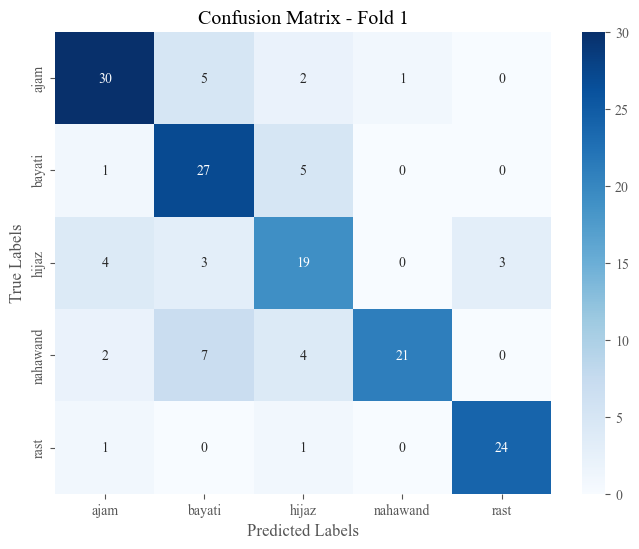

Classification Report:
               precision    recall  f1-score   support

        ajam       0.79      0.79      0.79        38
      bayati       0.64      0.82      0.72        33
       hijaz       0.61      0.66      0.63        29
    nahawand       0.95      0.62      0.75        34
        rast       0.89      0.92      0.91        26

    accuracy                           0.76       160
   macro avg       0.78      0.76      0.76       160
weighted avg       0.78      0.76      0.76       160


Results for Fold 2:


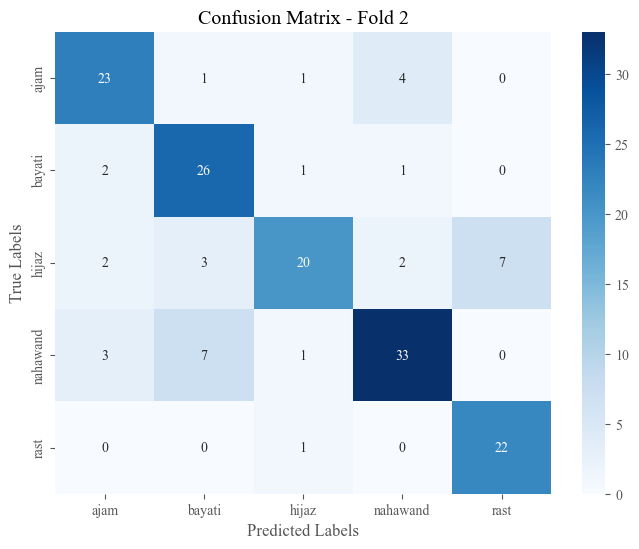

Classification Report:
               precision    recall  f1-score   support

        ajam       0.77      0.79      0.78        29
      bayati       0.70      0.87      0.78        30
       hijaz       0.83      0.59      0.69        34
    nahawand       0.82      0.75      0.79        44
        rast       0.76      0.96      0.85        23

    accuracy                           0.78       160
   macro avg       0.78      0.79      0.78       160
weighted avg       0.78      0.78      0.77       160


Results for Fold 3:


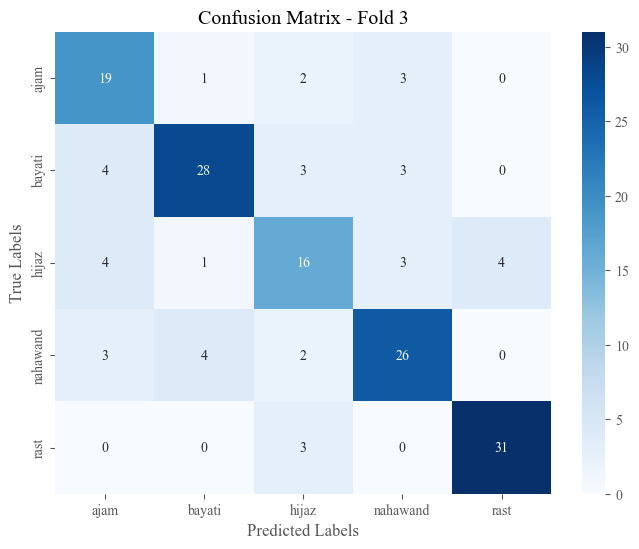

Classification Report:
               precision    recall  f1-score   support

        ajam       0.63      0.76      0.69        25
      bayati       0.82      0.74      0.78        38
       hijaz       0.62      0.57      0.59        28
    nahawand       0.74      0.74      0.74        35
        rast       0.89      0.91      0.90        34

    accuracy                           0.75       160
   macro avg       0.74      0.74      0.74       160
weighted avg       0.75      0.75      0.75       160


Results for Fold 4:


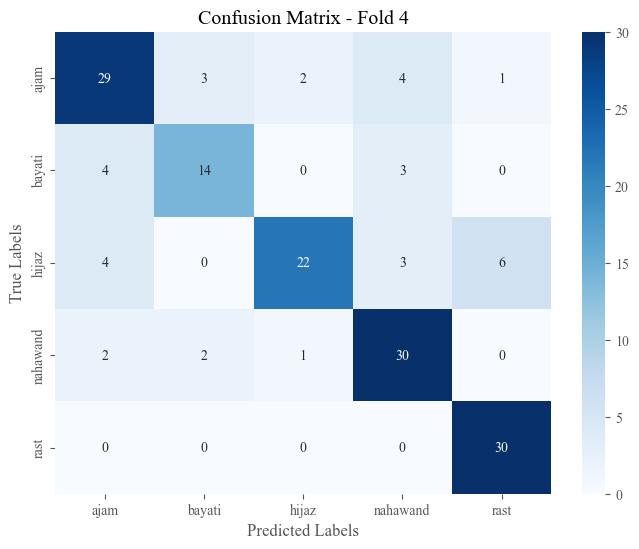

Classification Report:
               precision    recall  f1-score   support

        ajam       0.74      0.74      0.74        39
      bayati       0.74      0.67      0.70        21
       hijaz       0.88      0.63      0.73        35
    nahawand       0.75      0.86      0.80        35
        rast       0.81      1.00      0.90        30

    accuracy                           0.78       160
   macro avg       0.78      0.78      0.77       160
weighted avg       0.79      0.78      0.78       160


Results for Fold 5:


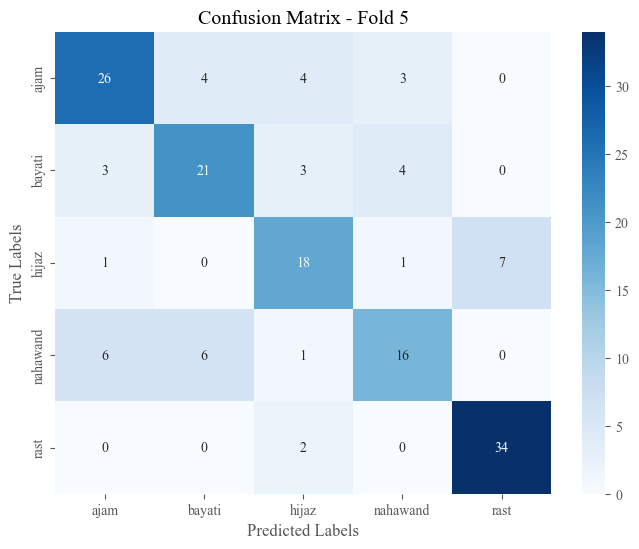

Classification Report:
               precision    recall  f1-score   support

        ajam       0.72      0.70      0.71        37
      bayati       0.68      0.68      0.68        31
       hijaz       0.64      0.67      0.65        27
    nahawand       0.67      0.55      0.60        29
        rast       0.83      0.94      0.88        36

    accuracy                           0.72       160
   macro avg       0.71      0.71      0.71       160
weighted avg       0.71      0.72      0.71       160


Results for Fold 6:


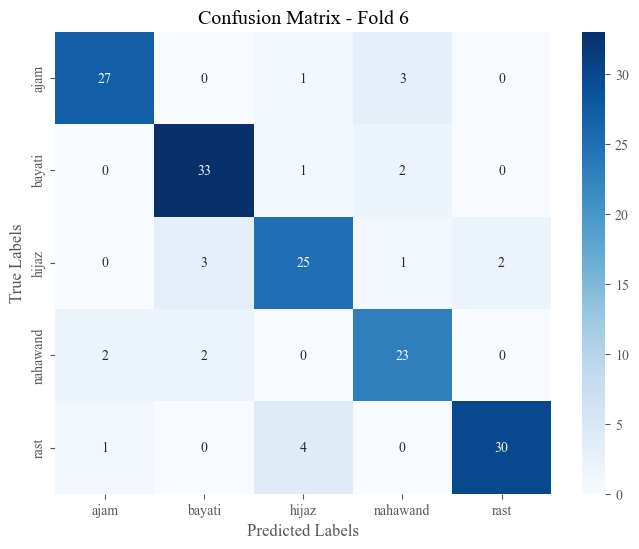

Classification Report:
               precision    recall  f1-score   support

        ajam       0.90      0.87      0.89        31
      bayati       0.87      0.92      0.89        36
       hijaz       0.81      0.81      0.81        31
    nahawand       0.79      0.85      0.82        27
        rast       0.94      0.86      0.90        35

    accuracy                           0.86       160
   macro avg       0.86      0.86      0.86       160
weighted avg       0.86      0.86      0.86       160


Results for Fold 7:


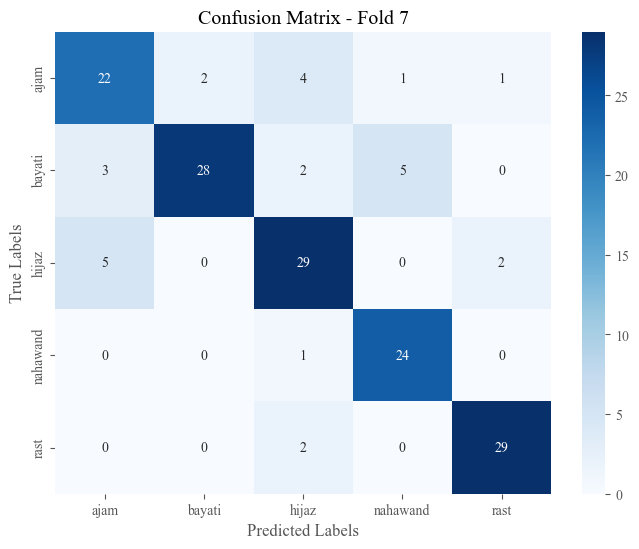

Classification Report:
               precision    recall  f1-score   support

        ajam       0.73      0.73      0.73        30
      bayati       0.93      0.74      0.82        38
       hijaz       0.76      0.81      0.78        36
    nahawand       0.80      0.96      0.87        25
        rast       0.91      0.94      0.92        31

    accuracy                           0.82       160
   macro avg       0.83      0.83      0.83       160
weighted avg       0.83      0.82      0.82       160


Results for Fold 8:


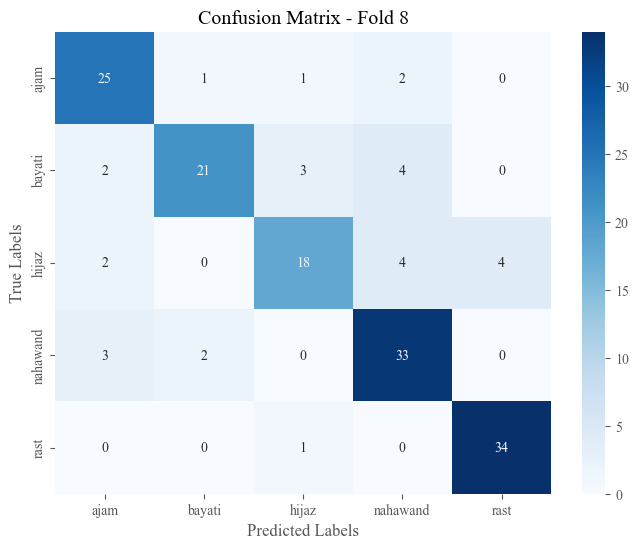

Classification Report:
               precision    recall  f1-score   support

        ajam       0.78      0.86      0.82        29
      bayati       0.88      0.70      0.78        30
       hijaz       0.78      0.64      0.71        28
    nahawand       0.77      0.87      0.81        38
        rast       0.89      0.97      0.93        35

    accuracy                           0.82       160
   macro avg       0.82      0.81      0.81       160
weighted avg       0.82      0.82      0.82       160


Results for Fold 9:


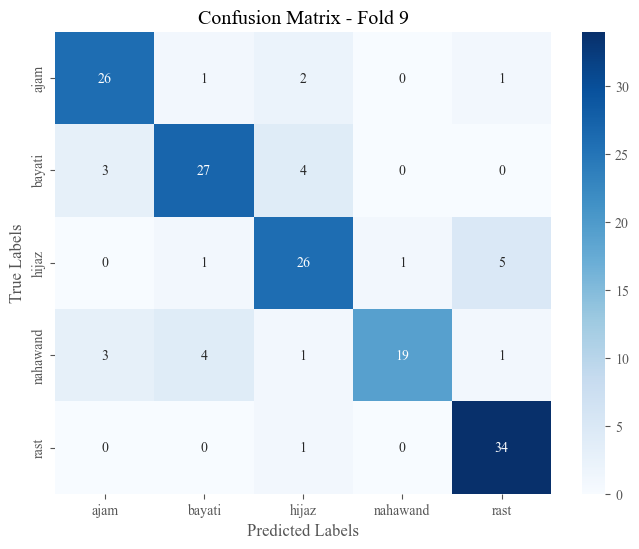

Classification Report:
               precision    recall  f1-score   support

        ajam       0.81      0.87      0.84        30
      bayati       0.82      0.79      0.81        34
       hijaz       0.76      0.79      0.78        33
    nahawand       0.95      0.68      0.79        28
        rast       0.83      0.97      0.89        35

    accuracy                           0.82       160
   macro avg       0.83      0.82      0.82       160
weighted avg       0.83      0.82      0.82       160


Results for Fold 10:


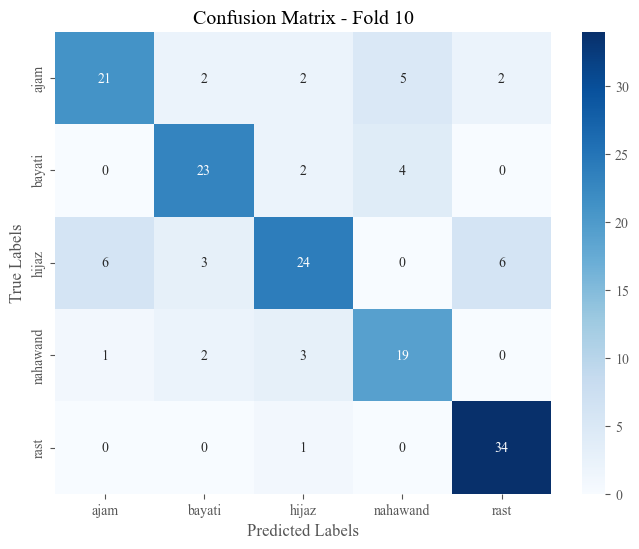

Classification Report:
               precision    recall  f1-score   support

        ajam       0.75      0.66      0.70        32
      bayati       0.77      0.79      0.78        29
       hijaz       0.75      0.62      0.68        39
    nahawand       0.68      0.76      0.72        25
        rast       0.81      0.97      0.88        35

    accuracy                           0.76       160
   macro avg       0.75      0.76      0.75       160
weighted avg       0.75      0.76      0.75       160



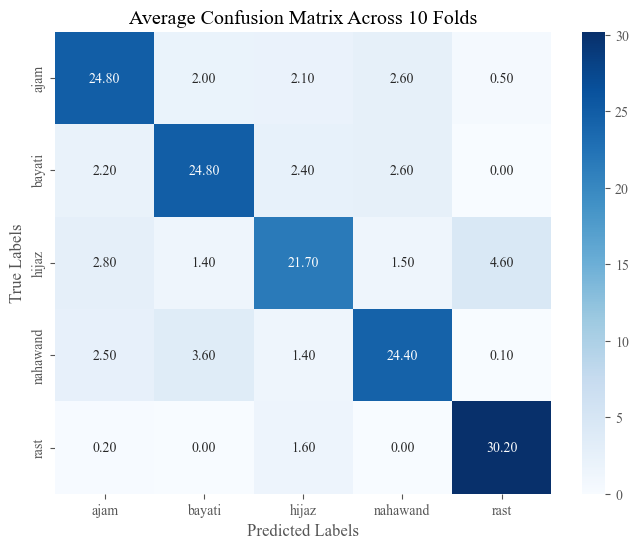

In [57]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

# Set font family to Times New Roman
mpl.rcParams['font.family'] = 'Times New Roman'

# Map class indices to specific labels
class_labels = ["ajam", "bayati", "hijaz", "nahawand", "rast"]

# Initialize variables to accumulate confusion matrices
average_cm = np.zeros((5, 5))  # Assuming 5 classes, adjust if necessary

# Loop through all folds
for i, fold_predictions in enumerate(all_predictions):
    print(f"\nResults for Fold {i + 1}:")

    true_labels = fold_predictions['true_labels']
    predicted_labels = fold_predictions['predicted_labels']

    # Create confusion matrix
    cm = confusion_matrix(true_labels, predicted_labels)

    # Accumulate confusion matrices
    average_cm += cm

    # Plot confusion matrix heatmap with labeled axes
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    plt.title(f'Confusion Matrix - Fold {i + 1}')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()
    
    print("Classification Report:\n", classification_reports[i])

# Calculate the average confusion matrix
average_cm /= len(all_predictions)

# Plot average confusion matrix heatmap with labeled axes
plt.figure(figsize=(8, 6))
sns.heatmap(average_cm, annot=True, fmt='.2f', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Average Confusion Matrix Across 10 Folds')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()



Results for Fold 1:


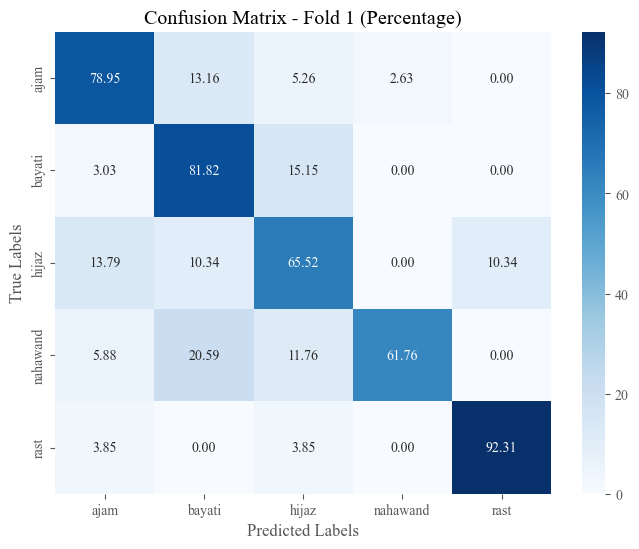

Classification Report:
               precision    recall  f1-score   support

        ajam       0.79      0.79      0.79        38
      bayati       0.64      0.82      0.72        33
       hijaz       0.61      0.66      0.63        29
    nahawand       0.95      0.62      0.75        34
        rast       0.89      0.92      0.91        26

    accuracy                           0.76       160
   macro avg       0.78      0.76      0.76       160
weighted avg       0.78      0.76      0.76       160


Results for Fold 2:


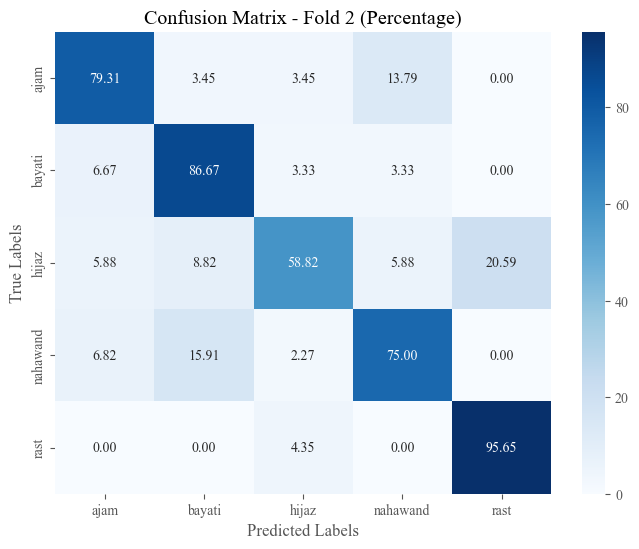

Classification Report:
               precision    recall  f1-score   support

        ajam       0.77      0.79      0.78        29
      bayati       0.70      0.87      0.78        30
       hijaz       0.83      0.59      0.69        34
    nahawand       0.82      0.75      0.79        44
        rast       0.76      0.96      0.85        23

    accuracy                           0.78       160
   macro avg       0.78      0.79      0.78       160
weighted avg       0.78      0.78      0.77       160


Results for Fold 3:


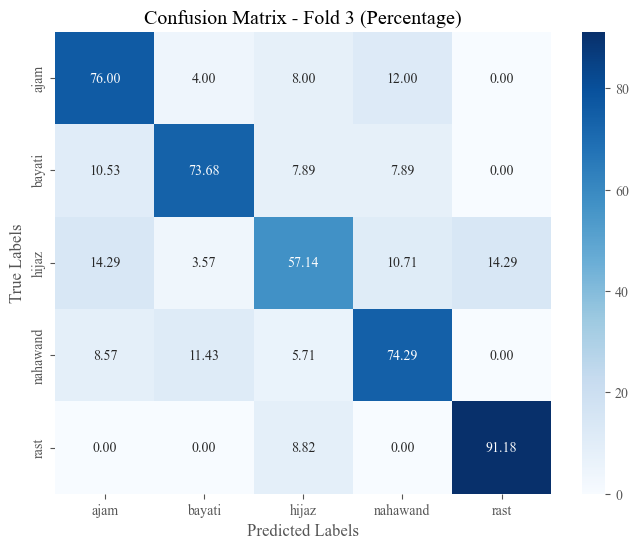

Classification Report:
               precision    recall  f1-score   support

        ajam       0.63      0.76      0.69        25
      bayati       0.82      0.74      0.78        38
       hijaz       0.62      0.57      0.59        28
    nahawand       0.74      0.74      0.74        35
        rast       0.89      0.91      0.90        34

    accuracy                           0.75       160
   macro avg       0.74      0.74      0.74       160
weighted avg       0.75      0.75      0.75       160


Results for Fold 4:


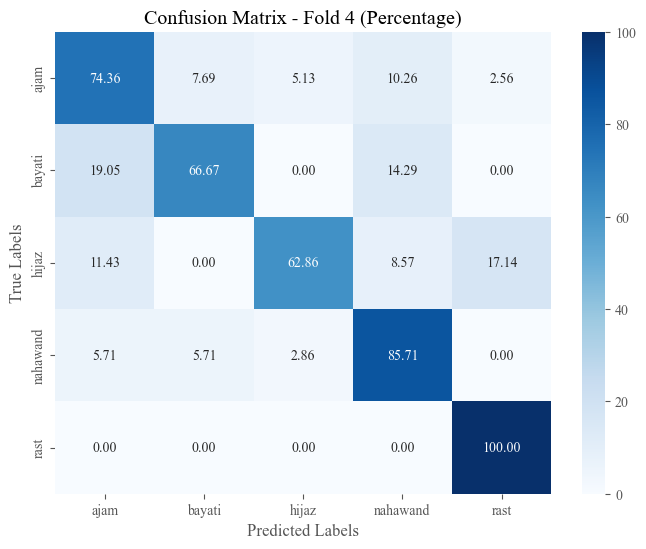

Classification Report:
               precision    recall  f1-score   support

        ajam       0.74      0.74      0.74        39
      bayati       0.74      0.67      0.70        21
       hijaz       0.88      0.63      0.73        35
    nahawand       0.75      0.86      0.80        35
        rast       0.81      1.00      0.90        30

    accuracy                           0.78       160
   macro avg       0.78      0.78      0.77       160
weighted avg       0.79      0.78      0.78       160


Results for Fold 5:


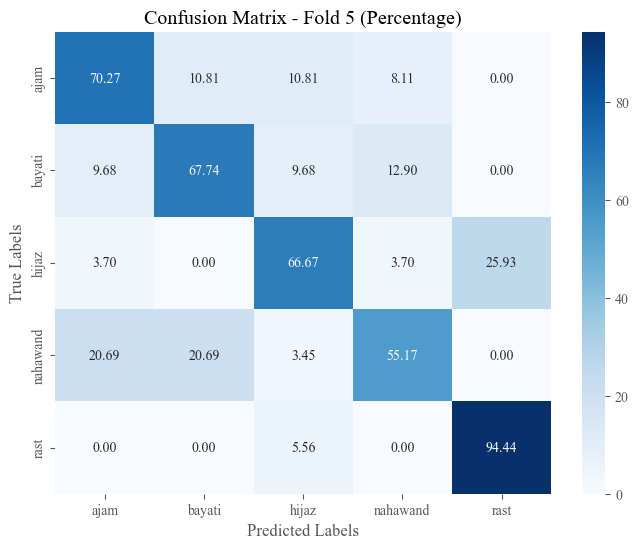

Classification Report:
               precision    recall  f1-score   support

        ajam       0.72      0.70      0.71        37
      bayati       0.68      0.68      0.68        31
       hijaz       0.64      0.67      0.65        27
    nahawand       0.67      0.55      0.60        29
        rast       0.83      0.94      0.88        36

    accuracy                           0.72       160
   macro avg       0.71      0.71      0.71       160
weighted avg       0.71      0.72      0.71       160


Results for Fold 6:


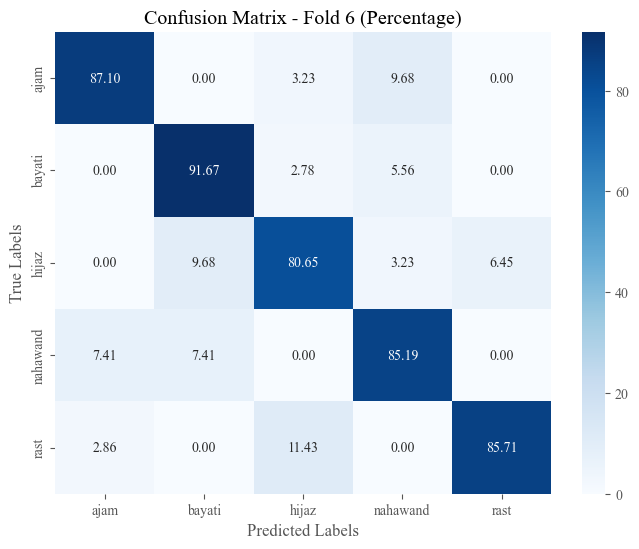

Classification Report:
               precision    recall  f1-score   support

        ajam       0.90      0.87      0.89        31
      bayati       0.87      0.92      0.89        36
       hijaz       0.81      0.81      0.81        31
    nahawand       0.79      0.85      0.82        27
        rast       0.94      0.86      0.90        35

    accuracy                           0.86       160
   macro avg       0.86      0.86      0.86       160
weighted avg       0.86      0.86      0.86       160


Results for Fold 7:


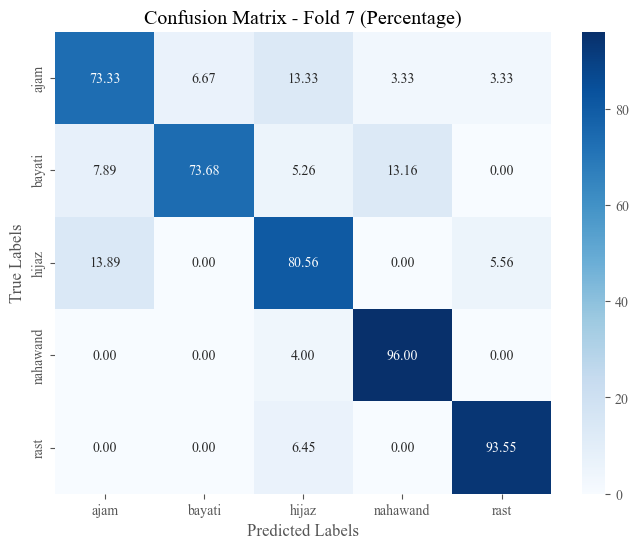

Classification Report:
               precision    recall  f1-score   support

        ajam       0.73      0.73      0.73        30
      bayati       0.93      0.74      0.82        38
       hijaz       0.76      0.81      0.78        36
    nahawand       0.80      0.96      0.87        25
        rast       0.91      0.94      0.92        31

    accuracy                           0.82       160
   macro avg       0.83      0.83      0.83       160
weighted avg       0.83      0.82      0.82       160


Results for Fold 8:


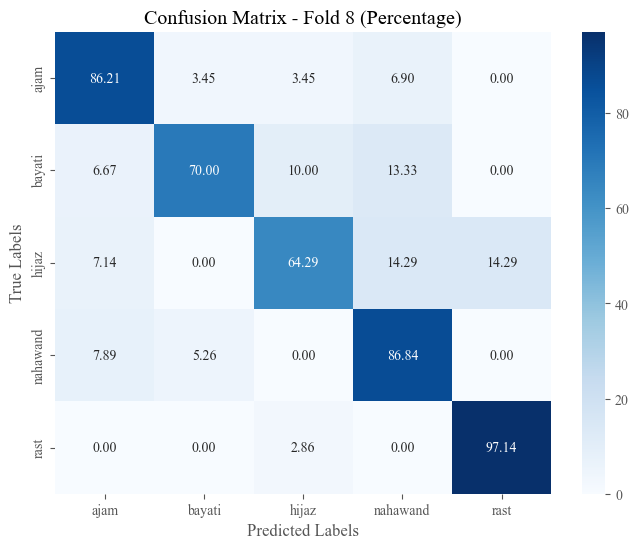

Classification Report:
               precision    recall  f1-score   support

        ajam       0.78      0.86      0.82        29
      bayati       0.88      0.70      0.78        30
       hijaz       0.78      0.64      0.71        28
    nahawand       0.77      0.87      0.81        38
        rast       0.89      0.97      0.93        35

    accuracy                           0.82       160
   macro avg       0.82      0.81      0.81       160
weighted avg       0.82      0.82      0.82       160


Results for Fold 9:


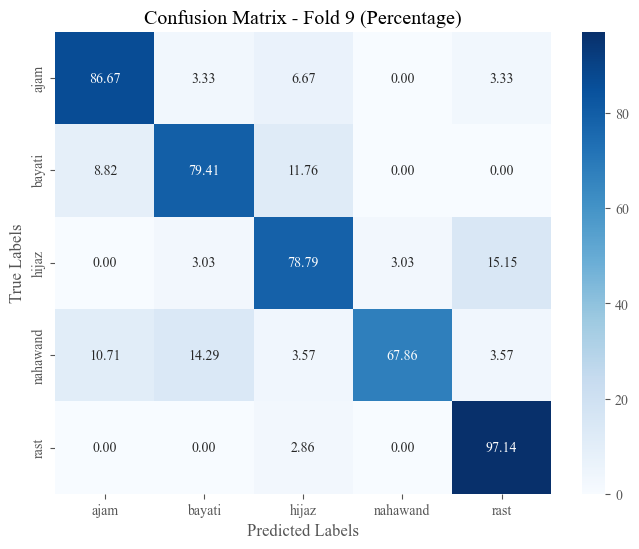

Classification Report:
               precision    recall  f1-score   support

        ajam       0.81      0.87      0.84        30
      bayati       0.82      0.79      0.81        34
       hijaz       0.76      0.79      0.78        33
    nahawand       0.95      0.68      0.79        28
        rast       0.83      0.97      0.89        35

    accuracy                           0.82       160
   macro avg       0.83      0.82      0.82       160
weighted avg       0.83      0.82      0.82       160


Results for Fold 10:


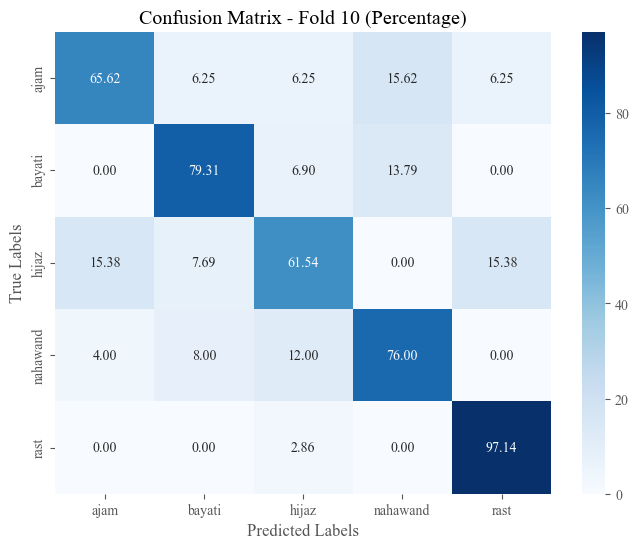

Classification Report:
               precision    recall  f1-score   support

        ajam       0.75      0.66      0.70        32
      bayati       0.77      0.79      0.78        29
       hijaz       0.75      0.62      0.68        39
    nahawand       0.68      0.76      0.72        25
        rast       0.81      0.97      0.88        35

    accuracy                           0.76       160
   macro avg       0.75      0.76      0.75       160
weighted avg       0.75      0.76      0.75       160



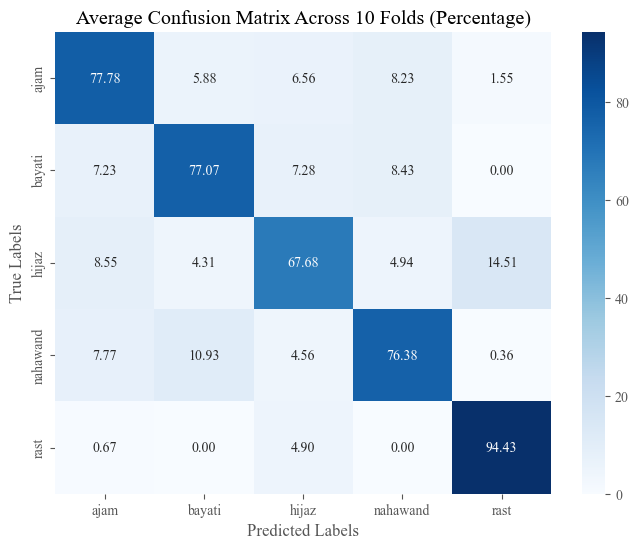


Average Classification Report Across 10 Folds:
          precision  recall  f1-score  support
ajam           0.76    0.78      0.77     32.0
bayati         0.78    0.77      0.77     32.0
hijaz          0.75    0.68      0.71     32.0
nahawand       0.79    0.76      0.77     32.0
rast           0.86    0.94      0.90     32.0


In [58]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

# Set font family to Times New Roman
mpl.rcParams['font.family'] = 'Times New Roman'

# Map class indices to specific labels
class_labels = ["ajam", "bayati", "hijaz", "nahawand", "rast"]

# Initialize variables to accumulate confusion matrices and classification reports
average_cm = np.zeros((5, 5))  # Assuming 5 classes, adjust if necessary
average_classification_report = {
    'precision': np.zeros(5),
    'recall': np.zeros(5),
    'f1-score': np.zeros(5),
    'support': np.zeros(5)
}

# Loop through all folds
for i, fold_predictions in enumerate(all_predictions):
    print(f"\nResults for Fold {i + 1}:")

    true_labels = fold_predictions['true_labels']
    predicted_labels = fold_predictions['predicted_labels']

    # Create confusion matrix
    cm = confusion_matrix(true_labels, predicted_labels)

    # Normalize confusion matrix to percentages
    cm_percentage = (cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]) * 100

    # Accumulate confusion matrices
    average_cm += cm_percentage

    # Display confusion matrix heatmap with labeled axes
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_percentage, annot=True, fmt='.2f', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    plt.title(f'Confusion Matrix - Fold {i + 1} (Percentage)')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

    # Display classification report
    current_classification_report = classification_report(true_labels, predicted_labels, target_names=class_labels)
    print("Classification Report:\n", current_classification_report)

    # Accumulate classification reports
    average_classification_report_fold = classification_report(true_labels, predicted_labels, target_names=class_labels, output_dict=True)
    for label in class_labels:
        average_classification_report['precision'][class_labels.index(label)] += average_classification_report_fold[label]['precision']
        average_classification_report['recall'][class_labels.index(label)] += average_classification_report_fold[label]['recall']
        average_classification_report['f1-score'][class_labels.index(label)] += average_classification_report_fold[label]['f1-score']
        average_classification_report['support'][class_labels.index(label)] += average_classification_report_fold[label]['support']

# Calculate the average confusion matrix
average_cm /= len(all_predictions)

# Plot average confusion matrix heatmap with labeled axes
plt.figure(figsize=(8, 6))
sns.heatmap(average_cm, annot=True, fmt='.2f', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Average Confusion Matrix Across 10 Folds (Percentage)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


# Calculate the average values for precision, recall, and F1-score
for metric in ['precision', 'recall', 'f1-score', 'support']:
    average_classification_report[metric] /= len(all_predictions)

# Round the values in the average classification report to two decimal places
for metric in ['precision', 'recall', 'f1-score']:
    average_classification_report[metric] = np.round(average_classification_report[metric], 2)

# Display average classification report
print("\nAverage Classification Report Across 10 Folds:")
average_classification_report_df = pd.DataFrame(average_classification_report, index=class_labels)
print(average_classification_report_df)

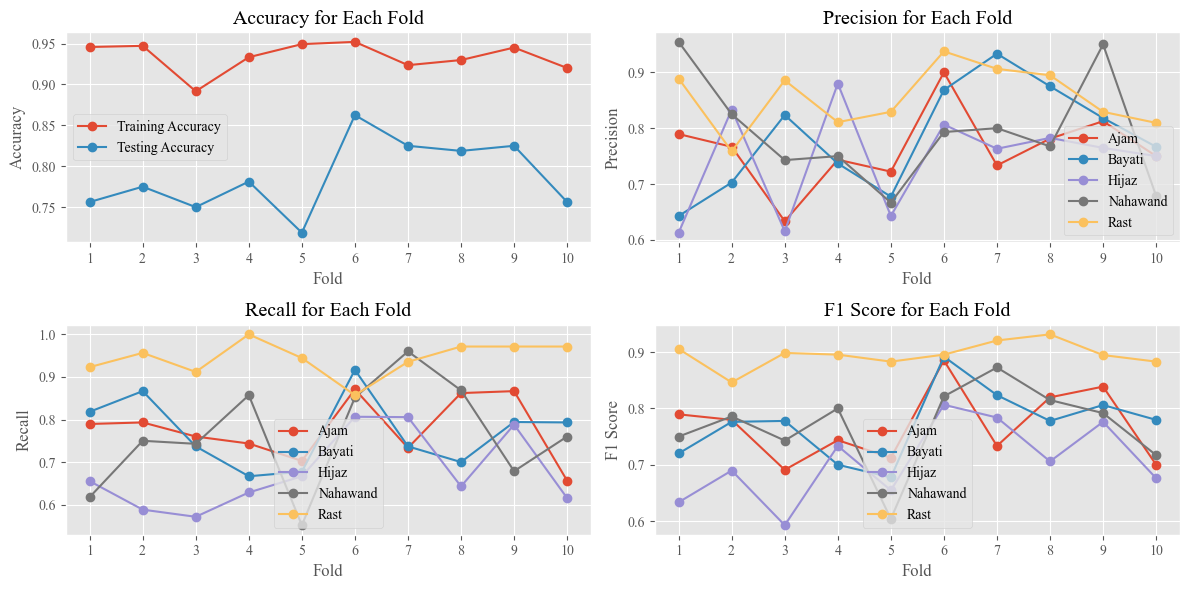

In [59]:
import matplotlib.pyplot as plt
import numpy as np

# Set font family to Times New Roman
plt.rcParams['font.family'] = 'Times New Roman'

# Define class labels
class_labels = ['Ajam', 'Bayati', 'Hijaz', 'Nahawand', 'Rast']

# Create arrays for plotting
fold_numbers = np.arange(1, fold)  # Adjust the range to match the actual number of folds
training_accuracies = np.array(train_accuracies)
testing_accuracies = np.array(testing_accuracies)
precision_scores = np.array(precicion_scores)
recall_scores = np.array(recall_scores)
f1_scores = np.array(f1_scores)

# Plotting Accuracy
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
plt.plot(fold_numbers, training_accuracies, label='Training Accuracy', marker='o')
plt.plot(fold_numbers, testing_accuracies, label='Testing Accuracy', marker='o')
plt.title('Accuracy for Each Fold')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.xticks(fold_numbers)  # Set xticks to match the number of folds
plt.legend()

# Plotting Precision
plt.subplot(2, 2, 2)
for class_num in range(precision_scores.shape[1]):
    plt.plot(fold_numbers, precision_scores[:, class_num], label=f'{class_labels[class_num]}', marker='o')
plt.title('Precision for Each Fold')
plt.xlabel('Fold')
plt.ylabel('Precision')
plt.xticks(fold_numbers)  # Set xticks to match the number of folds
plt.legend()

# Plotting Recall
plt.subplot(2, 2, 3)
for class_num in range(recall_scores.shape[1]):
    plt.plot(fold_numbers, recall_scores[:, class_num], label=f'{class_labels[class_num]}', marker='o')
plt.title('Recall for Each Fold')
plt.xlabel('Fold')
plt.ylabel('Recall')
plt.xticks(fold_numbers)  # Set xticks to match the number of folds
plt.legend()

# Plotting F1 Score
plt.subplot(2, 2, 4)
for class_num in range(f1_scores.shape[1]):
    plt.plot(fold_numbers, f1_scores[:, class_num], label=f'{class_labels[class_num]}', marker='o')
plt.title('F1 Score for Each Fold')
plt.xlabel('Fold')
plt.ylabel('F1 Score')
plt.xticks(fold_numbers)  # Set xticks to match the number of folds
plt.legend()

plt.tight_layout()
plt.show()


Runtime pelatihan fold 1: 139.97 detik
Runtime pelatihan fold 2: 171.18 detik
Runtime pelatihan fold 3: 157.87 detik
Runtime pelatihan fold 4: 135.75 detik
Runtime pelatihan fold 5: 128.46 detik
Runtime pelatihan fold 6: 141.62 detik
Runtime pelatihan fold 7: 139.15 detik
Runtime pelatihan fold 8: 132.28 detik
Runtime pelatihan fold 9: 111.25 detik
Runtime pelatihan fold 10: 77.08 detik
----------------------------------------
Total waktu eksekusi untuk semua fold: 1334.62 detik
Rata-rata waktu eksekusi: 133.46 detik


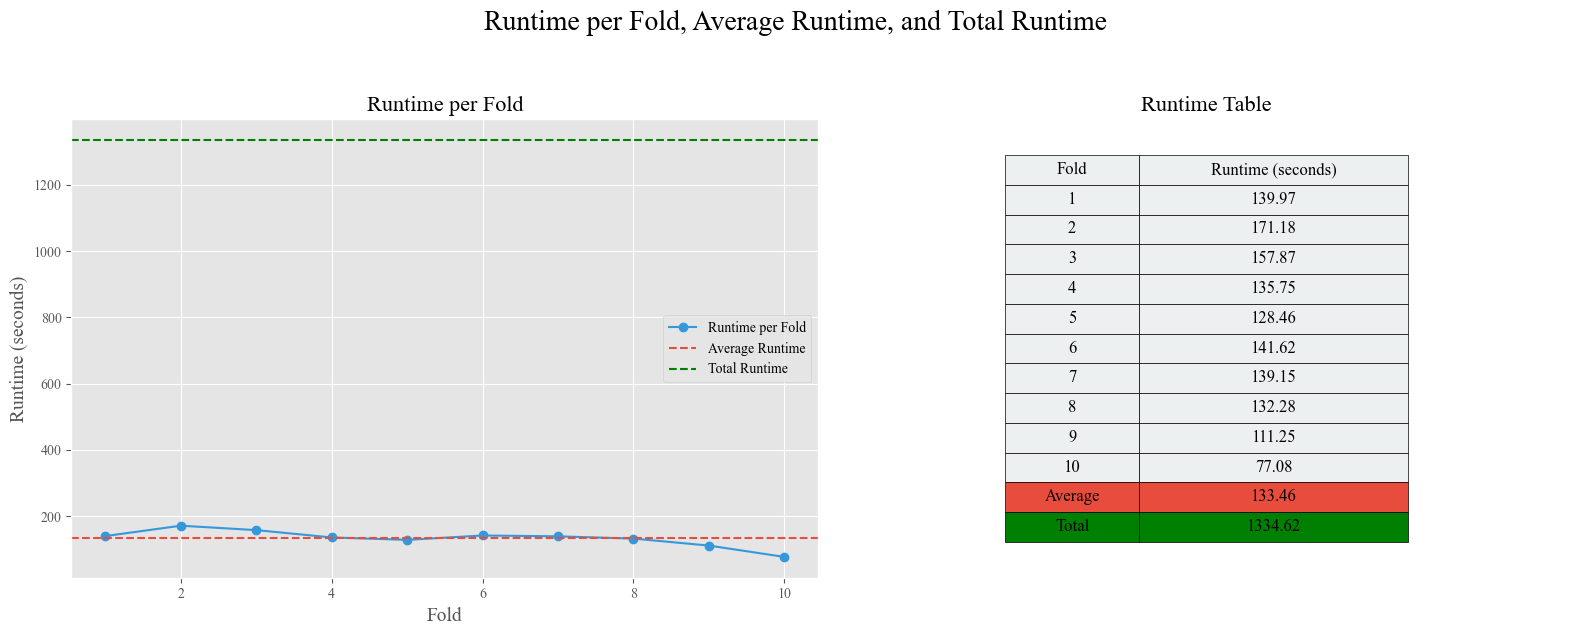

In [60]:
import numpy as np
import matplotlib.pyplot as plt

# Set font family to Times New Roman
plt.rcParams['font.family'] = 'Times New Roman'

# Cetak waktu eksekusi training untuk setiap fold
for i, time in enumerate(training_times):
    print(f"Runtime pelatihan fold {i + 1}: {time:.2f} detik")

# Menghitung rata-rata training loss dan akurasi dari masing-masing fold
average_time = np.mean(training_times)

# **Tambahkan total waktu eksekusi**
total_time = np.sum(training_times)

print("----------------------------------------")
print(f"Total waktu eksekusi untuk semua fold: {total_time:.2f} detik")
print(f"Rata-rata waktu eksekusi: {average_time:.2f} detik")

# Choose a color for highlighting and pastel blue for runtime per fold
highlight_color = '#e74c3c'  # Red for average runtime
pastel_blue_color = '#3498db'  # Pastel blue for runtime per fold

# Create a table with runtime information
table_data = [['Fold', 'Runtime (seconds)']]
for i, time in enumerate(training_times):
    table_data.append([f'{i + 1}', f'{time:.2f}'])

# Add the average and total runtime to the table and highlight the corresponding rows
table_data.append(['Average', f'{average_time:.2f}'])
table_data.append(['Total', f'{total_time:.2f}'])
average_row_index = len(table_data) - 2
total_row_index = len(table_data) - 1

# Plot runtime per fold as a line plot
plt.figure(figsize=(16, 6))

# Subplot 1: Line Plot
plt.subplot(1, 2, 1)
plt.plot(range(1, len(training_times) + 1), training_times, marker='o', color=pastel_blue_color, label='Runtime per Fold')
plt.axhline(y=average_time, color=highlight_color, linestyle='--', label='Average Runtime')
plt.axhline(y=total_time, color='green', linestyle='--', label='Total Runtime')  # **Tambahkan garis total waktu**
plt.title('Runtime per Fold', fontsize=16)
plt.xlabel('Fold', fontsize=14)
plt.ylabel('Runtime (seconds)', fontsize=14)
plt.legend()

# Subplot 2: Table
plt.subplot(1, 2, 2)
table = plt.table(cellText=table_data, loc='center', cellLoc='center', colWidths=[0.1, 0.2],
                  cellColours=[['#ecf0f1']*2] * average_row_index + [[highlight_color]*2] +
                               [['#ecf0f1']*2] * (total_row_index - average_row_index - 1) +
                               [['green']*2] +
                               [['#ecf0f1']*2] * (len(training_times) - total_row_index - 1))
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.8, 1.8)  # Adjust the scale to fit the content
plt.axis('off')  # Turn off the axis
plt.title('Runtime Table', fontsize=16)

plt.suptitle('Runtime per Fold, Average Runtime, and Total Runtime', fontsize=20, y=1.05)  # Adjust title position
plt.tight_layout()

plt.show()


In [61]:
# Menampilkan hasil training loss dan akurasi dari masing-masing fold
for i in range(len(losses)):
    print(f"Fold {i+1}: Loss = {losses[i]}, Accuracy = {train_accuracies[i]}")
    
# Menghitung rata-rata training loss dan akurasi dari masing-masing fold
average_loss = np.mean(losses)
average_accuracy = np.mean(train_accuracies)

print("----------------------------------------")
print(f"Rata-rata Loss: {average_loss}")
print(f"Rata-rata Akurasi: {average_accuracy}")

Fold 1: Loss = 0.20359143614768982, Accuracy = 0.9458333253860474
Fold 2: Loss = 0.16631433367729187, Accuracy = 0.9472222328186035
Fold 3: Loss = 0.30698880553245544, Accuracy = 0.8916666507720947
Fold 4: Loss = 0.21591970324516296, Accuracy = 0.9333333373069763
Fold 5: Loss = 0.18359284102916718, Accuracy = 0.949305534362793
Fold 6: Loss = 0.1626625657081604, Accuracy = 0.9520833492279053
Fold 7: Loss = 0.22538410127162933, Accuracy = 0.9236111044883728
Fold 8: Loss = 0.2236037403345108, Accuracy = 0.9298611283302307
Fold 9: Loss = 0.20692308247089386, Accuracy = 0.9451388716697693
Fold 10: Loss = 0.21944238245487213, Accuracy = 0.9201388955116272
----------------------------------------
Rata-rata Loss: 0.21144229918718338
Rata-rata Akurasi: 0.933819442987442


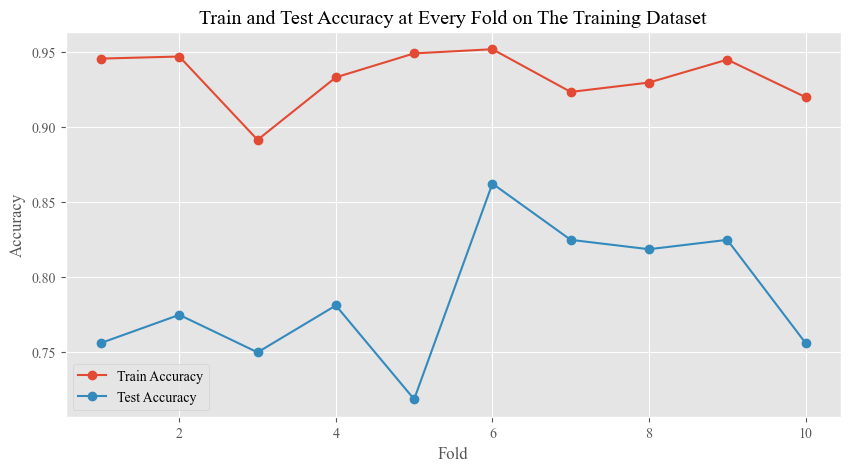

In [62]:
# Membuat plot akurasi
plt.figure(figsize=(10, 5))
plt.plot(range(1, fold ), train_accuracies, marker='o', label='Train Accuracy')
plt.plot(range(1, fold ), testing_accuracies, marker='o', label='Test Accuracy')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Train and Test Accuracy at Every Fold on The Training Dataset')
plt.legend()
plt.show()

Rata-rata Akurasi Training: 0.9338
Rata-rata Akurasi Testing: 0.7869


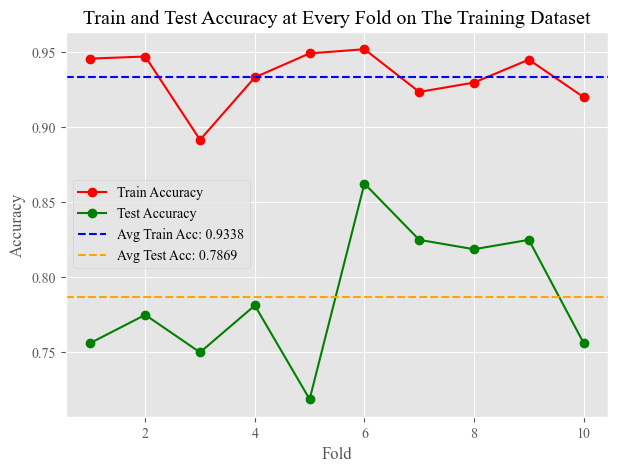

In [63]:
# Menampilkan rata-rata akurasi dari seluruh fold yang dilakukan pada training dan testing
avg_train_accuracy = np.mean(train_accuracies)
avg_test_accuracy = np.mean(testing_accuracies)

print(f"Rata-rata Akurasi Training: {avg_train_accuracy:.4f}")
print(f"Rata-rata Akurasi Testing: {avg_test_accuracy:.4f}")

# Membuat plot akurasi
plt.figure(figsize=(7, 5))
plt.plot(range(1, fold), train_accuracies, marker='o', color='red', label='Train Accuracy')
plt.plot(range(1, fold), testing_accuracies, marker='o', color='green', label='Test Accuracy')
plt.axhline(y=avg_train_accuracy, color='blue', linestyle='--', label=f'Avg Train Acc: {avg_train_accuracy:.4f}')
plt.axhline(y=avg_test_accuracy, color='orange', linestyle='--', label=f'Avg Test Acc: {avg_test_accuracy:.4f}')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Train and Test Accuracy at Every Fold on The Training Dataset')
plt.legend()
plt.show()

In [64]:
# Convert list testing_accuracies ke dalam numpy array
testing_accuracies_np = np.array(testing_accuracies)

# Hitung standar deviasi
std_deviation = np.std(testing_accuracies_np)

# Tampilkan hasil standar deviasi
print(f"Standar Deviasi Testing Accuracies: {std_deviation}")

Standar Deviasi Testing Accuracies: 0.042061153395978094



All Fold Accuracies:
Fold 1 Accuracy: 0.75625
Fold 2 Accuracy: 0.775
Fold 3 Accuracy: 0.75
Fold 4 Accuracy: 0.78125
Fold 5 Accuracy: 0.71875
Fold 6 Accuracy: 0.8625
Fold 7 Accuracy: 0.825
Fold 8 Accuracy: 0.81875
Fold 9 Accuracy: 0.825
Fold 10 Accuracy: 0.75625

Average Metrics Across Folds:
      Class  Precision  Recall  F1 Score
0      ajam       0.76    0.78      0.77
1    bayati       0.78    0.77      0.77
2     hijaz       0.75    0.68      0.71
3  nahawand       0.79    0.76      0.77
4      rast       0.86    0.94      0.90

Average Testing Accuracy Across All Folds: 0.79


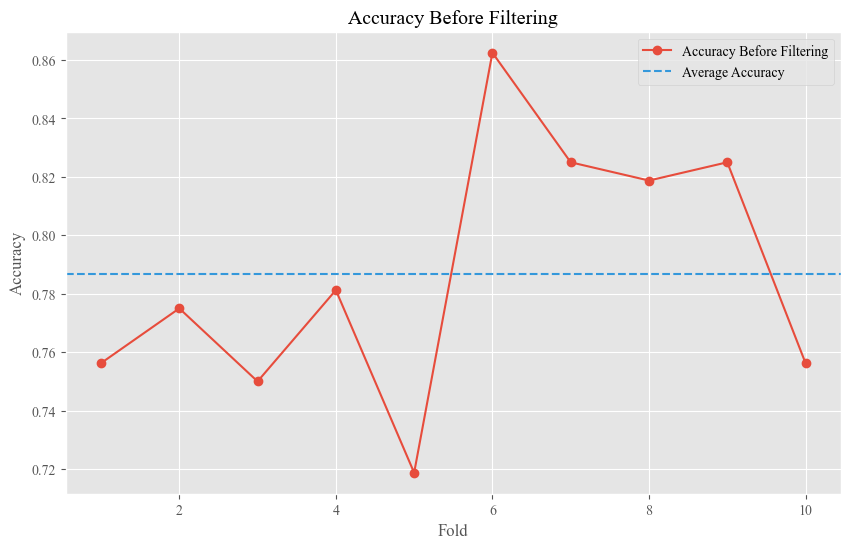

--------------------------------------------------------------------------------------------------------------------
Average Testing Accuracy: 0.786875
Standard Deviation: 0.042061153395978094
Filtered Testing Accuracies within One Standard Deviation:
Fold 1 - Accuracy: 0.75625
Fold 2 - Accuracy: 0.775
Fold 3 - Accuracy: 0.75
Fold 4 - Accuracy: 0.78125
Fold 7 - Accuracy: 0.825
Fold 8 - Accuracy: 0.81875
Fold 9 - Accuracy: 0.825
Fold 10 - Accuracy: 0.75625

Metrics for Filtered Testing Accuracies:
      Class  Precision  Recall  F1 Score
0      ajam       0.76    0.78      0.77
1    bayati       0.78    0.77      0.77
2     hijaz       0.75    0.68      0.71
3  nahawand       0.79    0.76      0.77
4      rast       0.86    0.94      0.90

Average Testing Accuracy (Filtered): 0.79


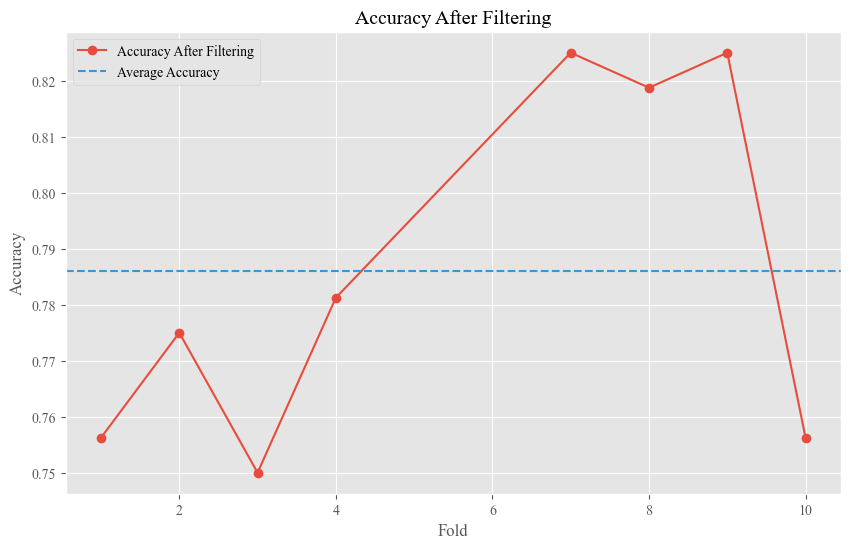

In [65]:
# Choose a color for highlighting and pastel blue for runtime per fold
highlight_color = '#e74c3c'  # Red for average runtime
pastel_blue_color = '#3498db'  # Pastel blue for runtime per fold

# Calculate the average metrics across all folds
avg_precision = np.mean(precision_scores, axis=0)
avg_recall = np.mean(recall_scores, axis=0)
avg_f1 = np.mean(f1_scores, axis=0)
avg_accuracy = np.mean(testing_accuracies)

# Create a DataFrame for average metrics
average_metrics = pd.DataFrame({
    'Class': ['ajam', 'bayati', 'hijaz', 'nahawand', 'rast'],
    'Precision': avg_precision,
    'Recall': avg_recall,
    'F1 Score': avg_f1
})

# Round average_metrics to two decimal places
average_metrics = average_metrics.round({'Precision': 2, 'Recall': 2, 'F1 Score': 2})

# Display the individual fold accuracies and average metrics
print("\nAll Fold Accuracies:")
for i, accuracy in enumerate(testing_accuracies, start=1):
    print(f"Fold {i} Accuracy: {accuracy}")

print("\nAverage Metrics Across Folds:")
print(average_metrics)

print(f"\nAverage Testing Accuracy Across All Folds: {avg_accuracy:.2f}")

# Plotting accuracy before filtering
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(testing_accuracies_np) + 1), testing_accuracies_np, marker='o', linestyle='-',color=highlight_color, label='Accuracy Before Filtering')
plt.axhline(y=avg_accuracy, color=pastel_blue_color, linestyle='--', label='Average Accuracy')

plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Accuracy Before Filtering')
plt.legend()
plt.show()

print("--------------------------------------------------------------------------------------------------------------------")

# Calculate average accuracy and standard deviation
average_accuracy = np.mean(testing_accuracies_np)
std_deviation = np.std(testing_accuracies_np)

# Filter testing accuracies based on standard deviation
testing_acc_after_std = []

for i, accuracy in enumerate(testing_accuracies_np):
    if average_accuracy - std_deviation <= accuracy <= average_accuracy + std_deviation:
        testing_acc_after_std.append((i + 1, accuracy))  # Include fold information

# Display results
print(f"Average Testing Accuracy: {average_accuracy}")
print(f"Standard Deviation: {std_deviation}")
print(f"Filtered Testing Accuracies within One Standard Deviation:")

for fold_num, acc in testing_acc_after_std:
    print(f"Fold {fold_num} - Accuracy: {acc}")

# Calculate and display precision, recall, and F1 score for filtered accuracies
filtered_predictions = [all_predictions[i - 1] for i, _ in testing_acc_after_std]

# Aggregate predictions from filtered folds
all_true_labels = np.concatenate([pred['true_labels'] for pred in filtered_predictions])
all_predicted_labels = np.concatenate([pred['predicted_labels'] for pred in filtered_predictions])

# Calculate metrics
filtered_precision = precision_score(all_true_labels, all_predicted_labels, average=None)
filtered_recall = recall_score(all_true_labels, all_predicted_labels, average=None)
filtered_f1 = f1_score(all_true_labels, all_predicted_labels, average=None)

# Round df to two decimal places
average_metrics = average_metrics.round({'Precision': 2, 'Recall': 2, 'F1 Score': 2})

# Display metrics for filtered accuracies
print("\nMetrics for Filtered Testing Accuracies:")
print(average_metrics)

# Calculate average accuracy for filtered accuracies
average_filtered_accuracy = np.mean([acc for _, acc in testing_acc_after_std])

# Display average accuracy for filtered accuracies
print(f"\nAverage Testing Accuracy (Filtered): {average_filtered_accuracy:.2f}")

# Plotting accuracy after filtering
filtered_fold_numbers, filtered_accuracies = zip(*testing_acc_after_std)

plt.figure(figsize=(10, 6))
plt.plot(filtered_fold_numbers, filtered_accuracies, marker='o', linestyle='-',color=highlight_color, label='Accuracy After Filtering')
plt.axhline(y=average_filtered_accuracy, color=pastel_blue_color, linestyle='--', label='Average Accuracy')

plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Accuracy After Filtering')
plt.legend()
plt.show()


In [66]:
 # Prediksi model
prediction = model.predict(X_test)    
test_pred = np.argmax(prediction, axis=1)
test_pred = label_encoder.inverse_transform(test_pred)
true_y = label_encoder.inverse_transform(np.argmax(to_categorical(y_test), axis=1)[:, 1])

13/13 [==============================] - 1s 15ms/step


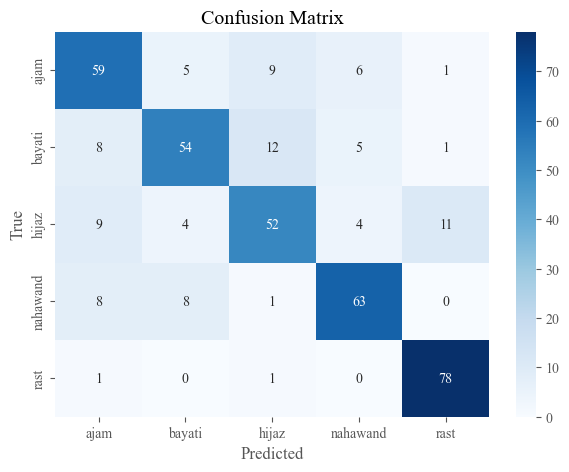


Classification Report:
              precision    recall  f1-score   support

        ajam     0.6941    0.7375    0.7152        80
      bayati     0.7606    0.6750    0.7152        80
       hijaz     0.6933    0.6500    0.6710        80
    nahawand     0.8077    0.7875    0.7975        80
        rast     0.8571    0.9750    0.9123        80

    accuracy                         0.7650       400
   macro avg     0.7626    0.7650    0.7622       400
weighted avg     0.7626    0.7650    0.7622       400



In [67]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# Hitung confusion matrix
conf_matrix = confusion_matrix(true_y, test_pred)

# Plot confusion matrix
plt.figure(figsize=(7, 5))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Tampilkan classification report
print("\nClassification Report:")
print(classification_report(true_y, test_pred, target_names=label_encoder.classes_, digits=4))
